# PCA 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import umap

In [14]:
# read text data file
data = np.loadtxt('pca_data.txt')
data

array([[ 0.15577518,  0.3815071 , -0.27964889, ..., -0.33626288,
         0.52214053, -0.12844284],
       [-0.25157293, -0.62868778,  0.23054575, ...,  0.65877129,
        -0.47864564, -0.06699679],
       [ 0.12406604,  0.1624342 , -0.09592387, ..., -0.20754835,
         0.2407105 ,  0.02399169],
       ...,
       [-0.07051366, -0.00992513, -0.12683092, ...,  0.12660751,
         0.05864094, -0.03109701],
       [-0.18501115, -0.72532163,  0.3691466 , ...,  0.52773602,
        -0.67919702,  0.10335882],
       [ 0.17563677,  0.0898811 , -0.0886389 , ..., -0.2687618 ,
         0.18672659,  0.11369684]])

In [15]:
# center the data points
mean = np.mean(data, axis=0)
centered_data = data - mean

# compute the covariance matrix
covariance_matrix = np.cov(centered_data, rowvar = False)

# compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# sort the eigen vectors and take the first two elements
sorted_indices = eigenvalues.argsort()[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvectors_2D = sorted_eigenvectors[:,:2]

print(sorted_eigenvectors_2D)

[[-1.85519716e-02 -4.21066493e-02]
 [-6.94139522e-02  5.44212480e-03]
 [ 5.35748040e-02 -9.06403565e-02]
 [ 3.92593289e-03 -4.76895925e-02]
 [-2.55296800e-02  6.93779607e-02]
 [-1.94905375e-02  4.69708097e-04]
 [-3.38447484e-02 -9.92562835e-02]
 [ 5.22910818e-02  3.46209745e-02]
 [ 5.13696723e-02 -2.47083387e-02]
 [ 5.28164408e-02  3.83317882e-03]
 [-2.77429334e-03  2.26232349e-02]
 [-1.38445217e-01 -2.13590259e-02]
 [ 4.36803952e-02 -5.72610599e-02]
 [-1.00159556e-01  1.39943981e-02]
 [ 4.27814925e-02  2.29117861e-02]
 [-1.20297239e-01  3.27743949e-02]
 [ 7.10024165e-02 -5.52192267e-02]
 [ 1.67949580e-02  3.22876086e-02]
 [-1.11501911e-01  6.12756749e-02]
 [ 1.07716210e-02 -5.39988457e-02]
 [-4.30478578e-02  2.03283884e-02]
 [ 3.87264861e-02  2.21225378e-02]
 [ 8.96992396e-02 -3.54837326e-02]
 [ 4.43626524e-02  3.89637575e-02]
 [ 2.68970418e-02  2.91136371e-02]
 [-2.42344606e-02 -1.56290455e-02]
 [ 3.30240880e-02  2.07372636e-02]
 [ 3.07359552e-03  5.43832559e-05]
 [ 4.16896829e-02  4

In [16]:
# project the data to the 2D plane
projected_data = np.dot(centered_data, sorted_eigenvectors_2D)

print(projected_data)

[[-8.86387503  0.59690571]
 [ 4.63134915  3.06375661]
 [-7.52758353 -0.52099834]
 ...
 [-2.56646521  2.6485535 ]
 [ 5.18117068  0.81926848]
 [-6.51268006 -0.92907912]]


### 2D scatter plot for the data    

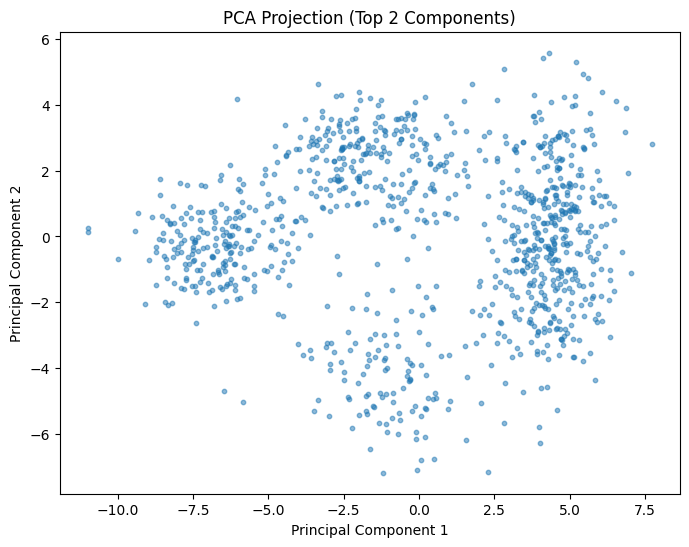

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5, s=10)
plt.title("PCA Projection (Top 2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### UMAP Projection (Top 2 Components)
  
Uniform Manifold Approximation and Projection

UMAP begins by finding the nearest neighbors for each data point. in this case 'n_neighbors'
means consider 10 neighbors for each data point while constructing the graph

The min_dist parameter sets the minimum distance between points in the low-dimensional space.


/media/tanveer/New Volume/L4-T2/CSE 472 - Machine Learning Sessional/Offline 4/solution/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


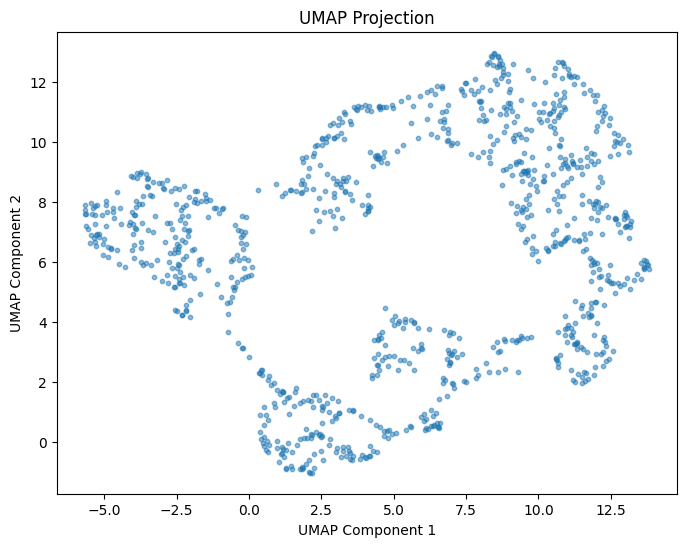

In [18]:
umap_model = umap.UMAP(n_neighbors=10, min_dist=.3, n_components=2, random_state=42)
umap_projection = umap_model.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(umap_projection[:, 0], umap_projection[:, 1], alpha=0.5, s=10)
plt.title("UMAP Projection")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()



### TSNE Projection

t-distributed stochastic neighbor embedding



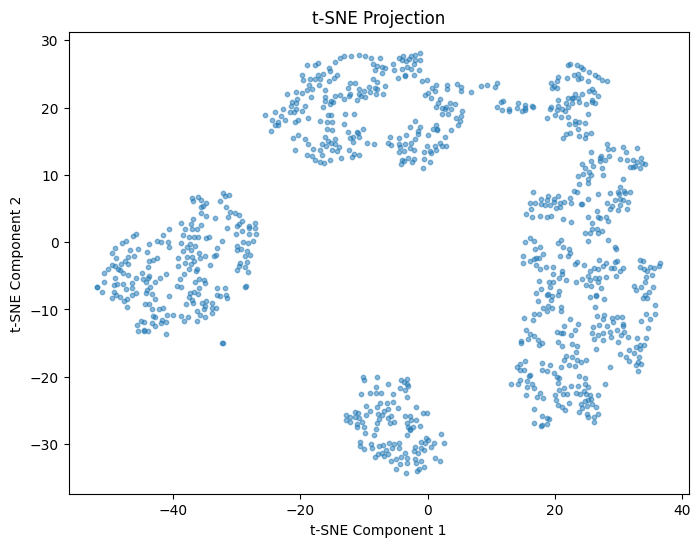

In [19]:
# t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_projection = tsne_model.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_projection[:, 0], tsne_projection[:, 1], alpha=0.5, s=10)
plt.title("t-SNE Projection")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

# EM Algorithm

In [20]:
data = np.loadtxt("em_data.txt", dtype=int)
# print(data)

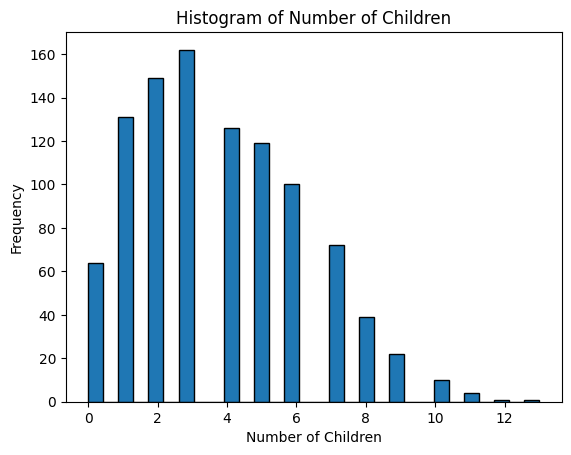

In [21]:
plt.hist(data, bins=30, edgecolor='k')
plt.title("Histogram of Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.show()

In [22]:
## P(X = x) = lambda^x * e^(-lambda) / fact(x)

def poisson_prob(x, lmd):
    return np.power(lmd, x) * np.exp(-lmd) / np.math.factorial(x)


In [23]:
# families with planning lambda1 and probability p1
# families without planning lambda2 and probability p2

# initial assignments
lambda1 = np.mean(data)*0.8
lambda2 = np.mean(data)*1.2

p1 = 0.5
p2 = 0.5

# iterations
itr = 100


for i in range(itr):
    # E-step
    planning_receied = []
    planning_not_receied = []

    for x in data:
        p_x_given_planning = poisson_prob(x, lambda1) * p1
        p_x_given_not_planning = poisson_prob(x, lambda2) * p2

        tot_prob = p_x_given_planning + p_x_given_not_planning

        planning_receied.append(p_x_given_planning/tot_prob)    
        planning_not_receied.append(p_x_given_not_planning/tot_prob)

    planning_receied = np.array(planning_receied)
    planning_not_receied = np.array(planning_not_receied)

    # M-step
    lambda1 = np.sum(planning_receied * data) / np.sum(planning_receied)
    lambda2 = np.sum(planning_not_receied * data) / np.sum(planning_not_receied)

    p1 = np.mean(planning_receied)
    p2 = np.mean(planning_not_receied)

print(f"Mean of families with family planning (λ1): {lambda1} ")
print(f"Mean of families without family planning (λ2): {lambda2} ")
print(f"Probability of families with family planning : {p1}")
print(f"Probability of families without family planning : {p2}")

/tmp/ipykernel_15890/2692861617.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.power(lmd, x) * np.exp(-lmd) / np.math.factorial(x)


Mean of families with family planning (λ1): 1.7850967177736463 
Mean of families without family planning (λ2): 4.912999675464747 
Probability of families with family planning : 0.3567884587725623
Probability of families without family planning : 0.6432115412274376
